<a href="https://colab.research.google.com/github/YazGonzalezHerrera/Ecuaciones-Diferenciales-Parciales-2/blob/main/M%C3%A9todo%20de%20Richardson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MÉTODO IMPLÍCITO DE RICHARDSON**

Método para que podamos resolver la siguiente ecuación del calor:

\frac{\partial u}{\partial t}(x,t) - \frac{\partial^2u}{\partial x^2} = 0

In [19]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  #Necesario para 3D
from matplotlib import cm  #Colormap

In [2]:
def f(x):
    return np.sin(np.pi*x)

In [3]:
A = sp.Matrix([[3,-1, 0, 0, 0, 0, 0, 0, 0],
              [-1, 3,-1, 0, 0, 0, 0, 0, 0],
              [0, -1, 3,-1, 0, 0, 0, 0, 0],
              [0, 0, -1, 3,-1, 0, 0, 0, 0],
              [0, 0, 0, -1, 3,-1, 0, 0, 0],
              [0, 0, 0, 0, -1, 3,-1, 0, 0],
              [0, 0, 0, 0, 0, -1, 3,-1, 0],
              [0, 0, 0, 0, 0, 0, -1, 3,-1],
              [0, 0, 0, 0, 0, 0, 0, -1, 3,]])

**`Ejercicio 1.`** Codifica la matriz A de manera más simple.

In [20]:
#Matriz A tridiagonal
n = 9
A = np.zeros((n, n))
for i in range(n):
    A[i, i] = 3  #Diagonal principal
    if i > 0:
        A[i, i-1] = -1  #Subdiagonal
    if i < n-1:
        A[i, i+1] = -1  #Superdiagonal

A_sym = sp.Matrix(A)  #Convertir a matriz simbólica para resolver

In [21]:
A_sym

Matrix([
[ 3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[-1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0,  0.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0, -1.0],
[ 0.0,  0.0,  0.0,  0.0,  0.0,  0.0,  0.0, -1.0,  3.0]])

In [4]:
b = sp.Matrix([f(0.1), f(0.2), f(0.3), f(0.4), f(0.5), f(0.6), f(0.7), f(0.8), f(0.9)])

**`Ejercicio 2.`** Definir las entradas de b de manera más simple.

In [23]:
#Vector b con condiciones iniciales
x_nodes = np.linspace(0.1, 0.9, 9)  #Nodos internos equidistantes
b_values = f(x_nodes)
b = sp.Matrix(b_values)

In [24]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [5]:
A

Matrix([
[ 3, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  3, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  3, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  3, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  3, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  3, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  3, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  3, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  3]])

In [6]:
b

Matrix([
[0.309016994374947],
[0.587785252292473],
[0.809016994374947],
[0.951056516295154],
[              1.0],
[0.951056516295154],
[0.809016994374947],
[0.587785252292473],
[0.309016994374948]])

In [7]:
A.LUsolve(b)

Matrix([
[0.281465217775586],
[0.535378658951812],
[0.736885506787377],
[ 0.86626086703537],
[ 0.91084057802358],
[ 0.86626086703537],
[0.736885506787377],
[0.535378658951812],
[0.281465217775587]])

In [8]:
def richardson_1(A, b, j):
    b_1 = b
    for i in range(j+1):
        sol = A.LUsolve(b_1)
        b_1 = sol
        _ = None #Para que no imprima resultados parciales
    return b_1

In [9]:
richardson_1(A, b, 3)

Matrix([
[0.212692337894623],
[0.404564867841463],
[  0.5568357697548],
[0.654599706821597],
[0.688286863720354],
[0.654599706821597],
[  0.5568357697548],
[0.404564867841463],
[0.212692337894623]])

In [10]:
def richardson(A, b, j):
    S = []
    b_1 = b.copy()

    for i in range(j+1):
        S.append(np.array(b_1, dtype=float).reshape(-1))  # vector fila
        sol = A.LUsolve(b_1)
        b_1 = sol

    return np.array(S)   # matriz resultado

**`Ejercicio 3.`** Graficar para un valor particular de t>0 y comparar contra la gráfica de la solución exacta.

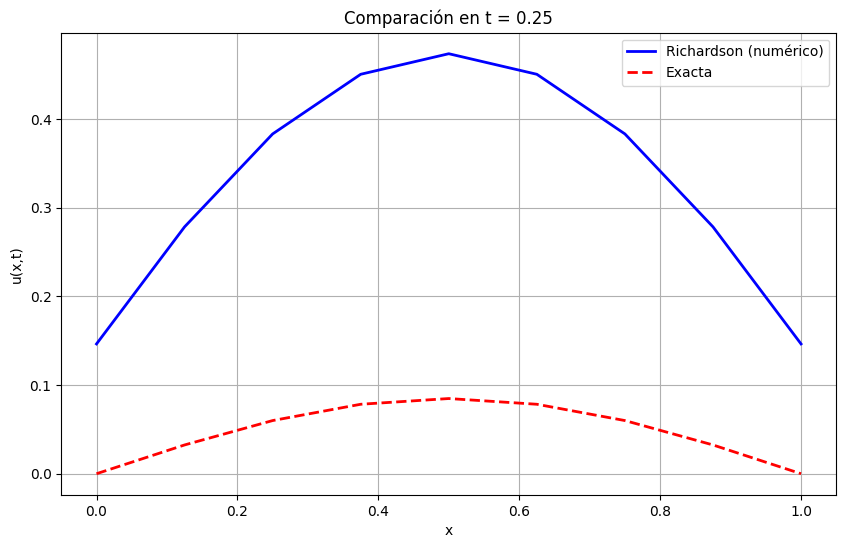

In [31]:
#Solución exacta (para α=1)
def u_exact(x, t):
    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

#Comparación en un tiempo específico
t_comparacion = 0.25
idx_t = np.argmin(np.abs(y - t_comparacion))

plt.figure(figsize=(10, 6))
plt.plot(x, U[idx_t], 'b-', linewidth=2, label='Richardson (numérico)')
plt.plot(x, u_exact(x, t_comparacion), 'r--', linewidth=2, label='Exacta')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title(f'Comparación en t = {t_comparacion:.2f}')
plt.legend()
plt.grid(True)
plt.show()

**`Ejercicio 4.`** ¿Es necesario resolver el sistema de 9 x 9 o podemos hacer una simplificación?

El sistema si puede simplificarse ya que la matriz A es tridiagonal, simétrica y definida positiva.
Por lo que se puede usar el algoritmo de Thomas.

In [11]:
j = 20 # Número de pasos en el tiempo

In [12]:
U=richardson(A, b, j)

In [13]:
x = np.linspace(0, 1, 9) #Número de nodos internos en X
y = np.linspace(0, 0.6, j+1) #Debe coincidir con el tamaño de j por k (tiempo)
X, Y = np.meshgrid(x, y)

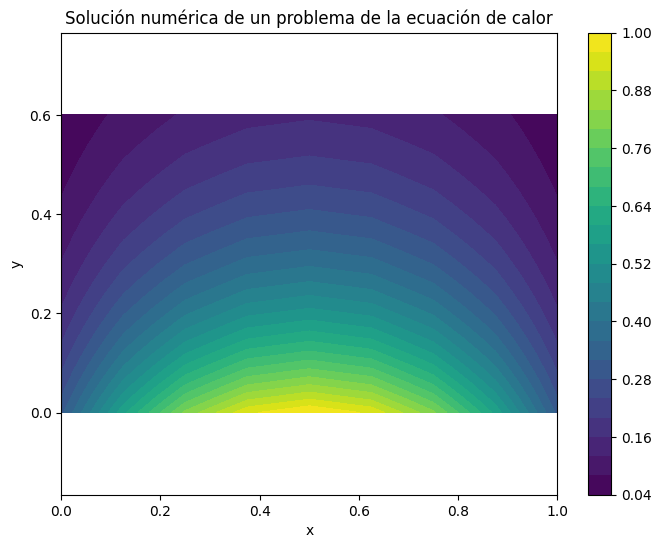

In [36]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de la ecuación de calor')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

**`Ejercicio 5.`** Explicación de la gráfica.

Es una visualización en escala de colores de la solución de la ecuación de calor, donde el amarillo son las temperaturas más altas y el azul son las más bajas.


En el eje X se muestra la posición espacial.

En el eje Y se muestra el tiempo.

A medida que aumenta el tiempo, los colores se vuelven más uniformes al azul. Eso indica que la temperatura decae exponencialmente conforme pasa el tiempo.

El calor se difunde desde las regiones calientes hacias las frias (desde el centro hacia los extremos).

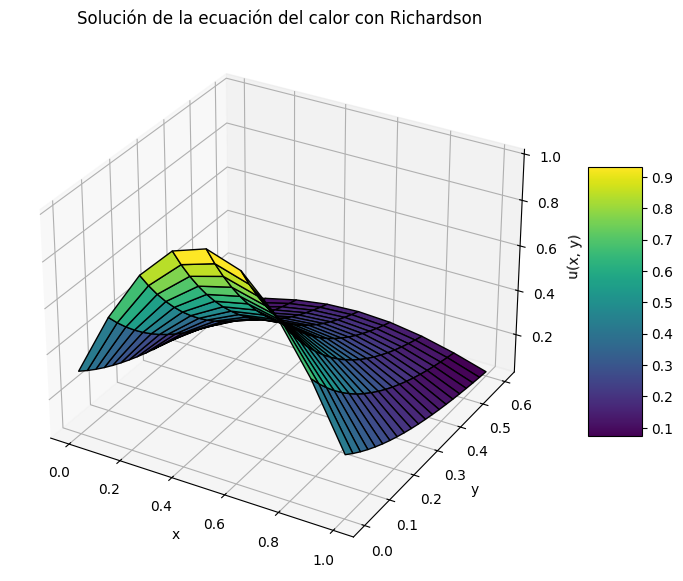

In [34]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de la ecuación del calor con Richardson')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

**`Ejercicio 6.`** Explicación de la gráfica.

En el eje X se muestra la posición espacial.

En el eje Y se muestra el tiempo.

En el eje Z se muestra la temperatura.

En t=0 se nota la forma sinusoidal de la condición inicial y a medida que pasa el tiempo la altura de la gráfica disminuye.

Los bordes en x=0 y en x=1 permanecen constantemente en u=0, lo que los hace fijos a lo largo del tiempo.

**`Ejercicio 7.`** Hay un ligero detalle con la precisión de estas gráficas, ¿cuál?

El detalle es que solo usa los 9 puntos espaciales, por lo que no puede capturar adecuadamente la forma sinusoidal.

Una malla más fina mejoraria la precisión.

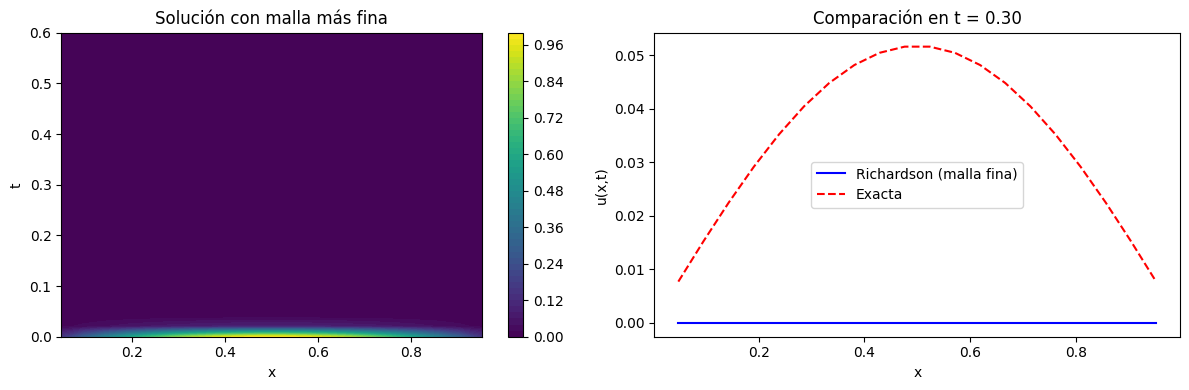

In [41]:
def richardson_mejorado(n_puntos, n_pasos_temporales, alpha=1.0):
    """
    Implementación mejorada del método de Richardson
    """
    #Discretización espacial
    dx = 1.0 / (n_puntos + 1)
    x = np.linspace(dx, 1-dx, n_puntos)

    #Matriz tridiagonal
    A = np.zeros((n_puntos, n_puntos))
    r = alpha / dx**2

    for i in range(n_puntos):
        A[i, i] = 1 + 2*r
        if i > 0:
            A[i, i-1] = -r
        if i < n_puntos-1:
            A[i, i+1] = -r

    #Condición inicial
    u_actual = f(x)
    historial = [u_actual.copy()]

    #Evolución temporal
    for paso in range(n_pasos_temporales):
        u_siguiente = np.linalg.solve(A, u_actual)
        historial.append(u_siguiente.copy())
        u_actual = u_siguiente

    return np.array(historial), x

#Ejemplo con malla más fina
U_fino, x_fino = richardson_mejorado(20, 30)
t_fino = np.linspace(0, 0.6, 31)
X_fino, T_fino = np.meshgrid(x_fino, t_fino)

#Visualización mejorada
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.contourf(X_fino, T_fino, U_fino, levels=50, cmap=cm.viridis)
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Solución con malla más fina')

plt.subplot(1, 2, 2)
t_comp = 0.3
idx_comp = np.argmin(np.abs(t_fino - t_comp))
plt.plot(x_fino, U_fino[idx_comp], 'b-', label='Richardson (malla fina)')
plt.plot(x_fino, u_exact(x_fino, t_comp), 'r--', label='Exacta')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.legend()
plt.title(f'Comparación en t = {t_comp:.2f}')
plt.tight_layout()
plt.show()

Material extra para la solución de la ecuación del calor.

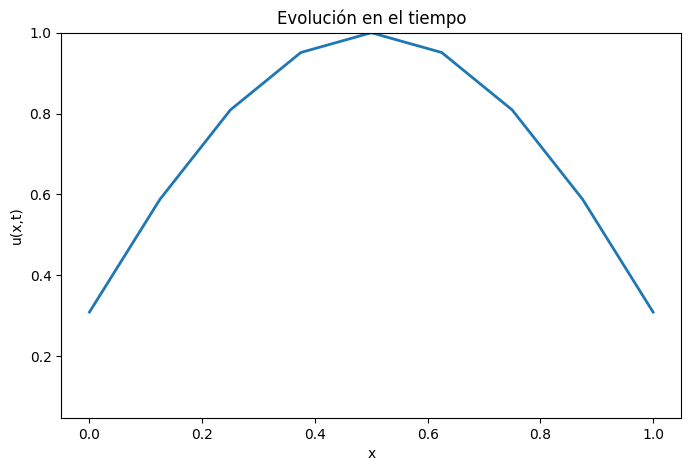

In [37]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U[0], lw=2)
ax.set_ylim(np.min(U), np.max(U))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()

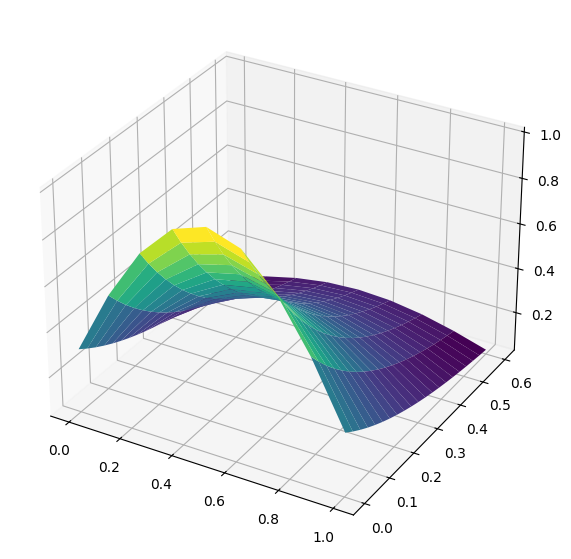

In [38]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U, cmap=cm.viridis)
plt.show()